In [76]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



In [77]:
data_train = pd.read_csv('Disaster_train.csv')

In [78]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [79]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [80]:
data_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [81]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [82]:
data_train.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [83]:
data_train['keyword'] = data_train['keyword'].fillna('none')

In [84]:
data_train['location'] = data_train['location'].fillna('unknown')

In [85]:
data_train.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


In [86]:
def clean_text(text):

    text = re.sub(r'http\S+|www\.\S+', '', text)

    text = re.sub(r'\#\w+|@\w+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()
    return text

# Apply cleaning
data_train['cleaned_text'] = data_train['text'].apply(clean_text)

In [87]:
data_train['cleaned_text']

,cleaned_text
0,our deeds are the reason of this may allah fo...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,people receive evacuation orders in california
4,just got sent this photo from ruby as smoke f...
...,...
7608,two giant cranes holding a bridge collapse int...
7609,the out of control wild fires in california ...
7610,m utckm s of volcano hawaii
7611,police investigating after an ebike collided w...


In [88]:
data_train[data_train['keyword'].isna()]

,id,keyword,location,text,target,cleaned_text


In [89]:
data_train[data_train['location'].isna()]

,id,keyword,location,text,target,cleaned_text


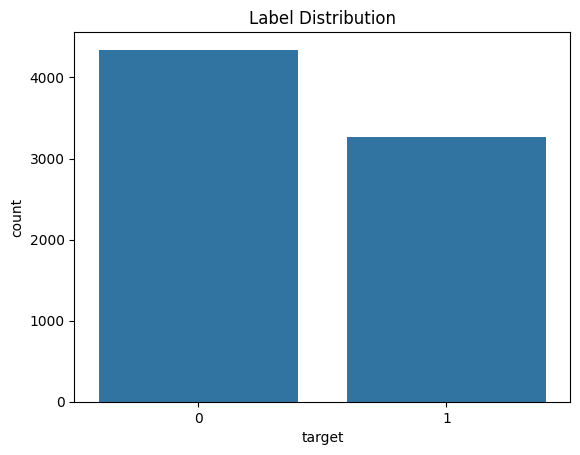

In [90]:


# Plot label distribution
sns.countplot(x='target', data=data_train)  # Replace 'label_column' with your label column
plt.title('Label Distribution')
plt.show()

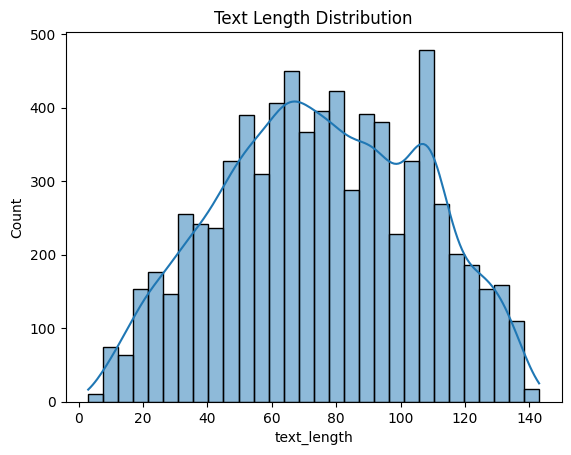

In [91]:
data_train['text_length'] = data_train['cleaned_text'].apply(len)

# Plot text length distribution
sns.histplot(data_train['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()


In [92]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
import nltk

# Download the required resource
nltk.download('punkt_tab')

# Your existing code
all_words = [word for text in data_train['cleaned_text'] for word in word_tokenize(text)]
word_freq = Counter(all_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


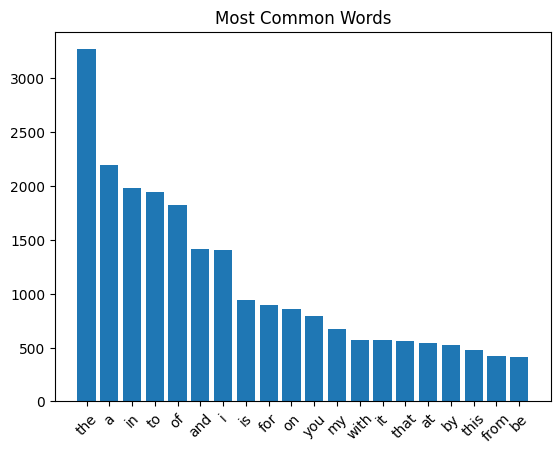

In [94]:
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
stop_words = set(stopwords.words('english'))


In [97]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [98]:
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

data_train['cleaned_text'] = data_train['cleaned_text'].apply(remove_stopwords)

In [99]:
data_train['cleaned_text']

,cleaned_text
0,deeds reason may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...
3,people receive evacuation orders california
4,got sent photo ruby smoke pours school
...,...
7608,two giant cranes holding bridge collapse nearb...
7609,control wild fires california even northern pa...
7610,utckm volcano hawaii
7611,police investigating ebike collided car little...


In [100]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

data_train['cleaned_text'] = data_train['cleaned_text'].apply(lemmatize_text)

In [102]:
data_train['cleaned_text']

,cleaned_text
0,deed reason may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive evacuation order california
4,got sent photo ruby smoke pours school
...,...
7608,two giant crane holding bridge collapse nearby...
7609,control wild fire california even northern par...
7610,utckm volcano hawaii
7611,police investigating ebike collided car little...


In [103]:
data_train.head()

,id,keyword,location,text,target,cleaned_text,text_length
0,1,none,unknown,Our Deeds are the Reason of this #earthquake M...,1,deed reason may allah forgive u,58
1,4,none,unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,37
2,5,none,unknown,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,130
3,6,none,unknown,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation order california,49
4,7,none,unknown,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke pours school,71


In [104]:
import gensim
print(gensim.__version__)

4.3.3


In [105]:
#from gensim.models import Word2Vec

# Prepare data for Word2Vec (list of tokenized words per document)
tokenized_texts = data_train['cleaned_text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Check the vocabulary size
print(f"Vocabulary size: {len(w2v_model.wv)}")


Vocabulary size: 5365


In [106]:


def get_document_vector(words, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

# Create feature matrix
data_train['w2v_features'] = tokenized_texts.apply(lambda x: get_document_vector(x, w2v_model))



In [107]:
X = np.vstack(data_train['w2v_features'].values)
y = data_train['target']

In [108]:
y.value_counts()

,count
target,
0,4342
1,3271


In [109]:
X.shape

(7613, 100)

In [110]:
y.shape

(7613,)

TEST DATA For Prediction

In [111]:
data_test = pd.read_csv('Disaster_test.csv')

In [112]:
data_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [113]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [114]:
data_test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [115]:
data_test.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [116]:
data_test['keyword'] = data_test['keyword'].fillna('none')
data_test['location'] = data_test['location'].fillna('none')

In [117]:
data_test.isnull().sum()

,0
id,0
keyword,0
location,0
text,0


In [118]:
def clean_text(text):

    text = re.sub(r'http\S+|www\.\S+', '', text)

    text = re.sub(r'\#\w+|@\w+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()
    return text

# Apply cleaning
data_test['cleaned_text'] = data_test['text'].apply(clean_text)

In [119]:
data_test['cleaned_text']

,cleaned_text
0,just happened a terrible car crash
1,heard about is different cities stay safe eve...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting
4,typhoon soudelor kills in china and taiwan
...,...
3258,earthquake safety los angeles safety fastener...
3259,storm in ri worse than last hurricane my citya...
3260,green line derailment in chicago
3261,meg issues hazardous weather outlook hwo


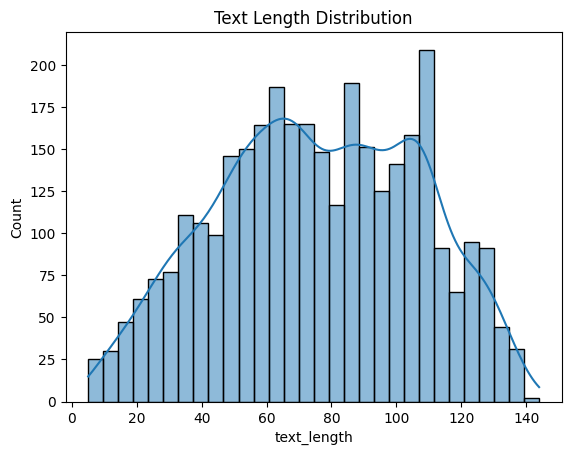

In [120]:
data_test['text_length'] = data_test['cleaned_text'].apply(len)

# Plot text length distribution
sns.histplot(data_test['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()


In [121]:
all_words = [word for text in data_test['cleaned_text'] for word in word_tokenize(text)]
word_freq = Counter(all_words)

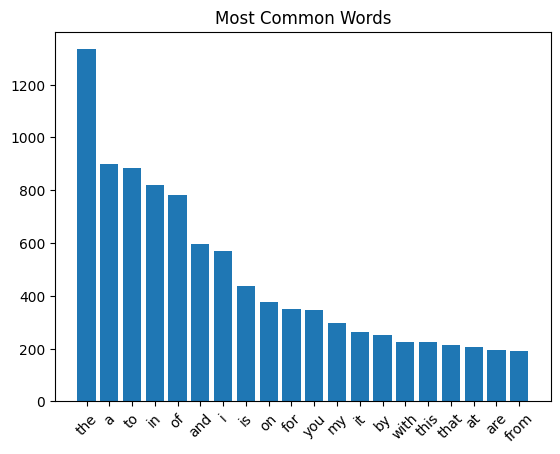

In [122]:
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [123]:
stop_words = set(stopwords.words('english'))

In [124]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [125]:
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

data_test['cleaned_text'] = data_test['cleaned_text'].apply(remove_stopwords)

In [126]:
data_test['cleaned_text']

,cleaned_text
0,happened terrible car crash
1,heard different cities stay safe everyone
2,forest fire spot pond geese fleeing across str...
3,apocalypse lighting
4,typhoon soudelor kills china taiwan
...,...
3258,earthquake safety los angeles safety fasteners...
3259,storm ri worse last hurricane cityampothers ha...
3260,green line derailment chicago
3261,meg issues hazardous weather outlook hwo


In [127]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

data_test['cleaned_text'] = data_test['cleaned_text'].apply(lemmatize_text)

In [128]:
data_test['cleaned_text']

,cleaned_text
0,happened terrible car crash
1,heard different city stay safe everyone
2,forest fire spot pond goose fleeing across str...
3,apocalypse lighting
4,typhoon soudelor kill china taiwan
...,...
3258,earthquake safety los angeles safety fastener ...
3259,storm ri worse last hurricane cityampothers ha...
3260,green line derailment chicago
3261,meg issue hazardous weather outlook hwo


In [129]:
tokenized_texts = data_test['cleaned_text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Check the vocabulary size
print(f"Vocabulary size: {len(w2v_model.wv)}")

Vocabulary size: 3189


In [130]:
def get_document_vector(words, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

# Create feature matrix
data_test['w2v_features'] = tokenized_texts.apply(lambda x: get_document_vector(x, w2v_model))

In [131]:
data_test

,id,keyword,location,text,cleaned_text,text_length,w2v_features
0,0,none,none,Just happened a terrible car crash,happened terrible car crash,34,"[-0.010238065617159009, 0.007626839098520577, ..."
1,2,none,none,"Heard about #earthquake is different cities, s...",heard different city stay safe everyone,51,"[-0.003495865826456187, 0.007471734502663215, ..."
2,3,none,none,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,94,"[-0.006274097436939233, 0.0032755894062574953,..."
3,9,none,none,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting,21,"[0.003853377013001591, 0.00229682307690382, -0..."
4,11,none,none,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,43,"[-0.007578195212408901, 0.005701601035252679, ..."
...,...,...,...,...,...,...,...
3258,10861,none,none,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,52,"[-0.004008396435528994, 0.0082394810160622, 0...."
3259,10865,none,none,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...,128,"[-0.007512425654567778, 0.007816280778570217, ..."
3260,10868,none,none,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,33,"[-0.0005461935070343316, 0.0010960881868413708..."
3261,10874,none,none,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,41,"[-0.0023091056694587073, 0.0016071593126980588..."


In [132]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [133]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [134]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [135]:
acc_score = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'accuracy_score : {acc_score}')
print(f'classification_report : {class_report}')

accuracy_score : 0.5896257386736704
classification_report :               precision    recall  f1-score   support

           0       0.59      0.98      0.73       874
           1       0.68      0.07      0.13       649

    accuracy                           0.59      1523
   macro avg       0.63      0.52      0.43      1523
weighted avg       0.63      0.59      0.47      1523



In [136]:
X_test_x = np.vstack(data_test['w2v_features'].values)
print(X_test_x.shape)

(3263, 100)


In [137]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [138]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (1523,)
Shape of y_pred: (1523,)


In [139]:
# Instead of:
# y_test = y_test.loc[X_test.index]

# Use integer indexing to select elements from y_test based on X_test's range of rows:
y_test = y_test[0:X_test.shape[0]]


In [140]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [141]:
y_pred_rf = randomforest.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 1, 1, 1])

In [142]:
acc_score = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
print(f'accuracy_score : {acc_score}')
print(f'classification_report : {class_report}')

accuracy_score : 0.7071569271175312
classification_report :               precision    recall  f1-score   support

           0       0.70      0.87      0.77       874
           1       0.73      0.49      0.59       649

    accuracy                           0.71      1523
   macro avg       0.72      0.68      0.68      1523
weighted avg       0.71      0.71      0.69      1523



In [143]:
print(X_test)

[[-1.66274097e-01  2.44979873e-01  1.98211601e-01 ... -3.24855506e-01
   2.74767384e-02  5.49015880e-04]
 [-1.32363127e-01  1.95808501e-01  1.52313164e-01 ... -2.55830825e-01
   1.99596535e-02 -3.76240816e-03]
 [-9.64015440e-02  1.39427436e-01  1.14058061e-01 ... -1.80813543e-01
   1.78866011e-02  3.64955314e-03]
 ...
 [-1.35654681e-01  2.00815376e-01  1.60288106e-01 ... -2.64412694e-01
   2.72747960e-02  1.71420327e-03]
 [-9.14208330e-02  1.30829835e-01  9.95469602e-02 ... -1.69572897e-01
   1.80713317e-02 -1.14368665e-03]
 [-6.46418305e-02  9.67788961e-02  7.45532689e-02 ... -1.28766326e-01
   1.23399599e-02  9.92403475e-05]]


In [144]:
y_pred = logistic.predict(X_test_x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [145]:

df_predictions = pd.DataFrame({'prediction': y_pred })  # 'id' is removed as it's not defined.  Add it back if you have an 'id' series/list.

df_predictions.head()  # Display the first few rows to check the DataFrame

,prediction
0,0
1,0
2,0
3,0
4,0


In [146]:
submission = pd.DataFrame({'id':data_test['id'],'target':y_pred})
print(submission)
submission.to_csv('submission.csv',index=False)

         id  target
0         0       0
1         2       0
2         3       0
3         9       0
4        11       0
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       0
3261  10874       0
3262  10875       0

[3263 rows x 2 columns]


In [147]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=submission)

https://docs.google.com/spreadsheets/d/1PUMvyfdD9ExwUI95uPfi45SJp0pEuI0d-etE_th6hXY#gid=0
